# Resolución de Año Nuevo

¿Hay más búsquedas en Google de los términos: `diet` (dieta), `gym` (gimnasio) y `finance` (finanzas) en Enero cuando todos estamos tratando de renovarnos con el inicio de un nuevo año? 

Este proyecto busca verificar `Los Datos de Tendencia de Google` obtenidos de la pagina `Google Trends` sobre la busqueda de las siguientes palabras: `diet`, `gym` y `finance`. Y se analizara cómo estas busquedas varían con el tiempo.

Estos datos pueden ser encontrados [aquí](https://trends.google.com/trends/explore?date=all&q=diet,gym,finance).
También se puede descargar los datos en formato `.csv`, para que cada persona pueda importar estos datos en sus propios entornos virtuales de Python y puedan realizar su propio análisis. 

En este proyecto primero se obtendrán los datos, luego se visualizarán, y finalmente se aprenderá acerca de `las Tendencias` y `la Estacionalidad` de estos datos. El énfasis se centrará en una exploración visual.

Entonces la pregunta sigue siendo: ¿Podría haber más búsquedas de estos palabras en Enero cuando todos estamos tratando de empezar un nuevo año? 

## Importando los Datos

In [182]:
# Primero hay que importar los siguientes paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

* Importando los datos descargardos y verificando las primeras filas:

In [183]:
# Ya que este archivo viene con un encabezado extra, 
# Usaremos skiprows para no incluirlo
df = pd.read_csv("data/multiTimeline.csv", skiprows = 1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


* Usando el método `.info ()` para verificar los tipos de datos, número de filas y más:

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


**Resumen:**

* Se importaron los datos de las tendencias de Google y fueron revisadas brevemente;

**A Continuacion:**

* Preparacion de datos y poniendolos en la forma deseada para el análisis.

## Preparacion de Datos

* Cambiamos el nombre de las columnas de `df` para que no tengan espacios:

In [185]:
df.columns = ['mes','dieta', 'gimnasio', 'finanzas']
df.head()

,mes,dieta,gimnasio,finanzas
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


* Convertimos la columna `month` en un tipo de `datos de fecha y hora` (to_datetime). Luego hacemos que esa columna sea el nuevo índice del DataFrame;

* Hay que tener cuidado cuando usen `.set_index()` porque crea un nuevo DataFrame en vez de alterar el original. Para poder alterar el original tienen que agregarle el parametro `inplace=True`;

In [186]:
df.mes = pd.to_datetime(df.mes)
df.set_index('mes', inplace=True);

In [187]:
df.head()

,dieta,gimnasio,finanzas
mes,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


* Ahora es el momento de explorar este DataFrame visualmente.

## Un Poco de Análisis Exploratorio de Datos

* Usando un método integrado de visualización de `pandas` para trazar los datos como gráficos de 3 líneas en una sola figura (uno para cada columna):

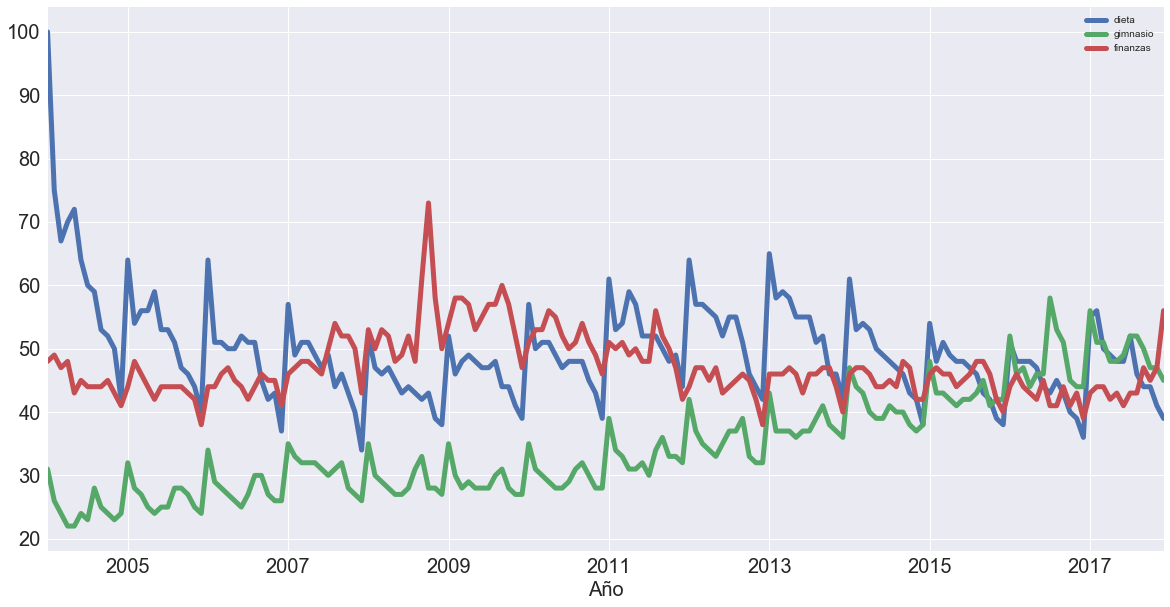

In [188]:
# Vamos a hacer que nuestro grafico se vea mejor
# Usando los parametros: figsize, linewidth, fontsize 
df.plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.xlabel("Año", fontsize=20);

* Ahora vamos a trazar solo la columna 'dieta' como una serie temporal:

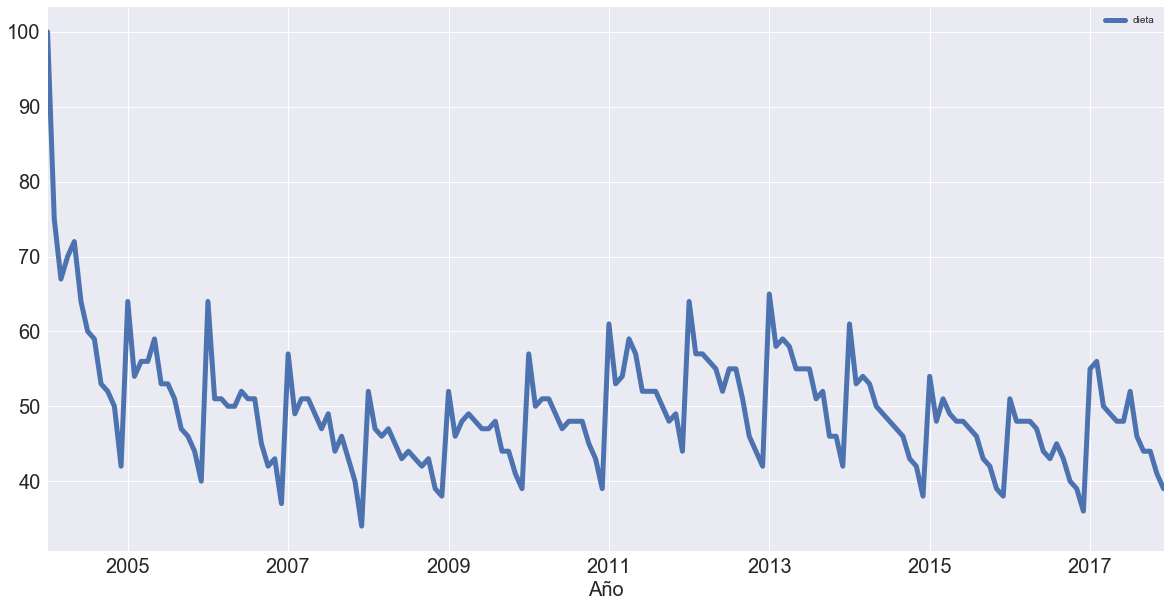

In [189]:
# Vamos a hacer que nuestro grafico se vea mejor
# Usando los parametros: figsize, linewidth, fontsize 
df[['dieta']].plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.xlabel("Año", fontsize=20);

** Nota: ** parece que hay `tendencias` y componentes `estacionales` en estas series temporales.
Lo primero que podemos notar es que hay `Estacionalidad`, en cada Enero (comienzo de año) hay un salto alto en la grafica. Pero tambien notamos que hay una `Tendencia` que empieza desde arriba, va bajando y luego sube un poco.  

**Resumen:**

* Se importaron los datos de las tendencias de Google y fueron revisados brevemente;
* Se ha discutido los datos y se convirtieron a la forma deseada para prepararlos para el análisis.
* Se ha verificado la serie temporal visualmente.

**A continuacion:**

* Se identificara las tendencias en la serie de tiempo.

Para obtener más información sobre Pandas, pueden ver el curso de la pagina DataCamp: [Manipulación de datos usando Python](https://www.datacamp.com/tracks/data-manipulation-with-python). Y para obtener más información sobre manipulacion de series de tiempo con Pandas, pueden ver el curso: [Manipulando Datos en Series de Tiempo usando Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python).

Si estás disfrutando de esta sesión, visita mi pagina de Facebook [Python Programming & Data Science](https://www.facebook.com/pythonfordatascience) y sígueme en Twitter: [@vmc62usa](https://twitter.com/vmc62usa)

## Hay alguna Tendencia?

Hay varias maneras de pensar sobre la identificación de tendencias en series de tiempo. 
Una manera popular es tomar el `Promedio Móvil`, es decir, para cada punto de tiempo se toma el promedio de los puntos de cada extremo (el número de puntos es especificado por el _tamaño de ventana_, el cual debemos elegir).

### Visualizando el Promedio Móvil:

* Trazamos el `Promedio Móvil` de `dieta` utilizando los métodos integrados de `pandas`. 
* ¿Qué tamaño de ventana tiene sentido usar?

Tomaremos el Promedio móvil de todo un año porque eso tiende a arreglar la Estacionalidad. Eso significa que usaremos un `tamaño de ventana` de 12 meses

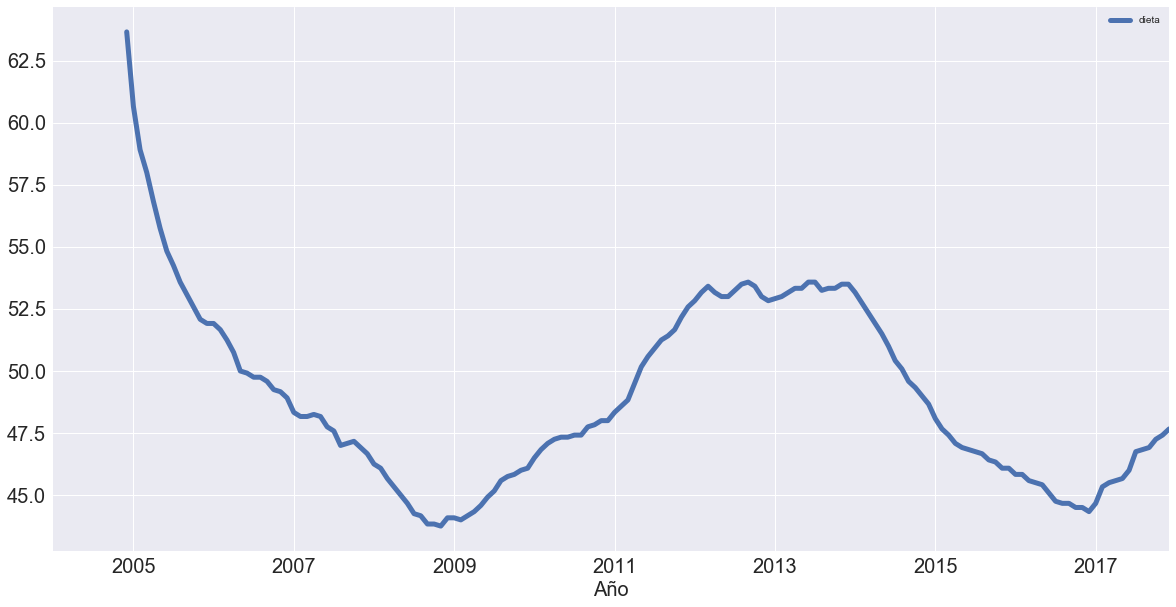

In [190]:
# Creamos un nuevo DataFrame llamado 'dieta' usando de la columna 'dieta' de nuestro DataFrame original
dieta = df[['dieta']]

# Luego tomamos el Promedio Movil de 12 meses y lo trazamos
dieta.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.xlabel("Año", fontsize=20);

Removimos la mayoria de la Estacionalidad y podemos ver claramente la `Tendencia` de la palabra `dieta` a traves de los años.

* Ahora trazamos el Promedio Móvil de `gimnasio` utilizando los métodos integrados de pandas.
* Y de nuevo usaremos un tamaño de ventana de 12 meses

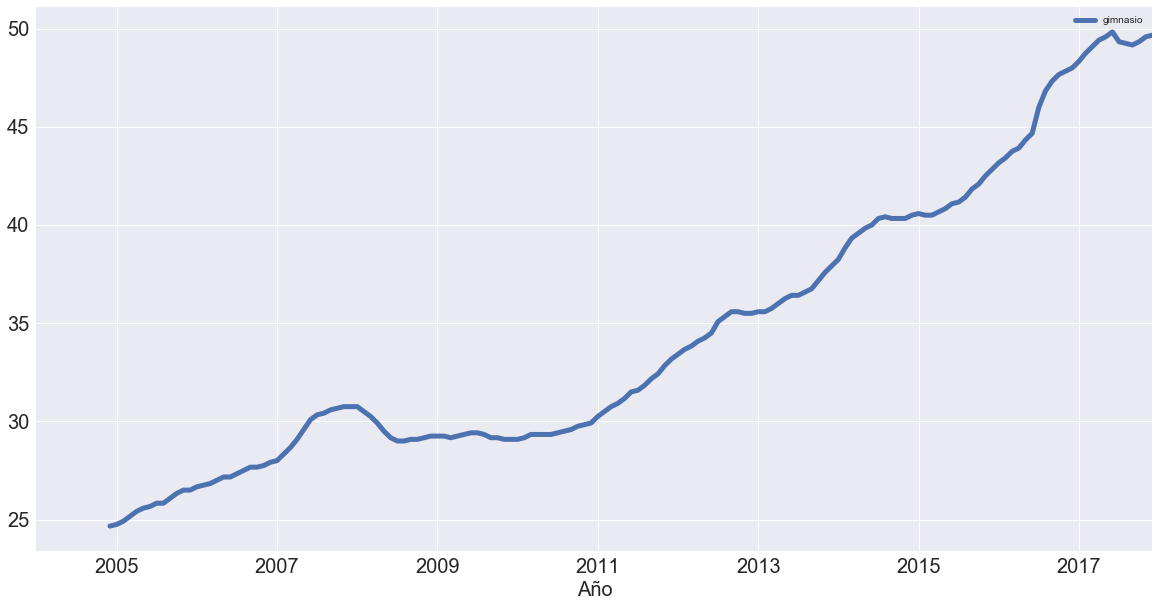

In [191]:
# Creamos un nuevo DataFrame llamado 'gimnasio' usando de la columna 'gimnasio' de nuestro DataFrame original
gimnasio = df[['gimnasio']]

# Luego tomamos el Promedio Movil de 12 meses y lo trazamos
gimnasio.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.xlabel("Año", fontsize=20);

De nuevo, removimos la mayoria de la Estacionalidad y podemos ver claramente la `Tendencia` de la palabra `gimnasio` a traves de los años. Claramente podemos ver un incremento en la busqueda de esta palabra.

* Ahora trazamos las tendencias de `gimnasio` y `dieta` en una sola grafica:

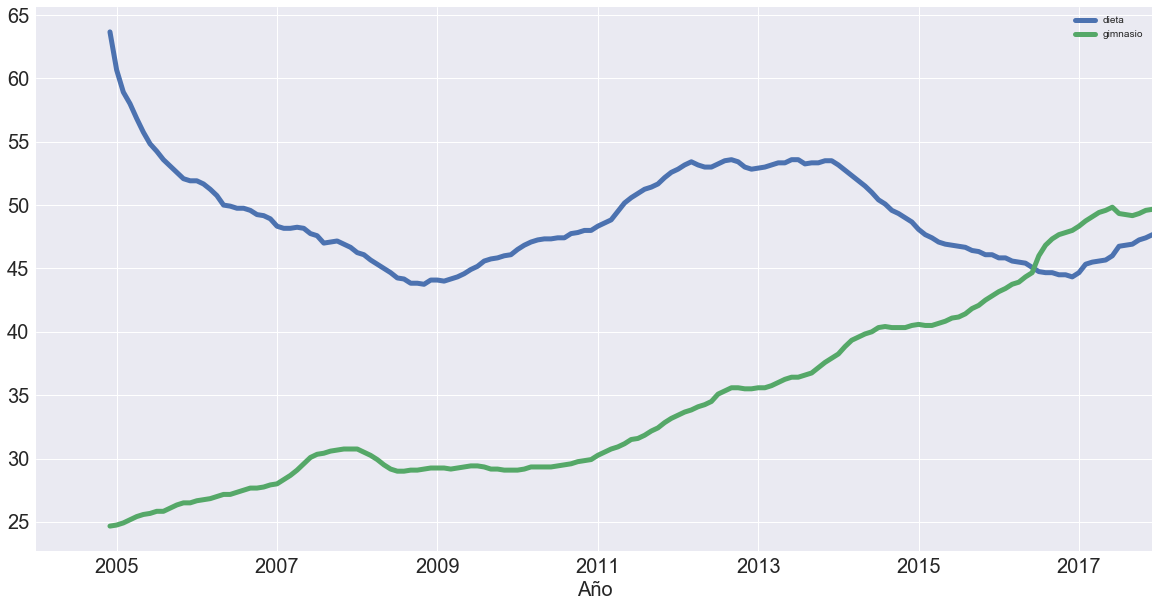

In [192]:
# Vamos a concatenar (unir) ambos DataFrames usando el metodo pd.concat
# Queremos concatenarlos como Columnas asi que usaremos el parametro axis=1

df_rm = pd.concat([dieta.rolling(12).mean(), gimnasio.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.xlabel("Año", fontsize=20);


Ahora que los tenemos en el mismo eje, removiendo la `Estacionalidad`, podemos ver que atraves de los años la palabra `dieta` tiene cierta estacionalidad (sube y baja), mientras que la busqueda de la palabra `gimnasio` se va incrementando.

* Ahora que identificamos las tendencias, vamos a concentrarnos en la `Estacionalidad`

## Patrones de Estacionalidad

Se puede eliminar la `tendencia` de una serie temporal para investigar su `estacionalidad`. Es decir, la `repetitividad` de nuestra serie de tiempo. En nuestra grafica original pudimos ver que nuestro trazado `oscilaba` de arriba a abajo.

* Una manera de eliminar la tendencia es es restando la tendencia calculada anteriormente (su Promedio Móvil) de los datos originales. Sin embargo, este nuevo calculo dependerá de la cantidad de puntos de datos sobre los que se haya promediado. 

* Otra forma de eliminar la tendencia se llama **diferenciación**, donde se observa la diferencia entre los puntos de datos sucesivos (`diferenciación de primer orden`).

### Diferenciacion de Primer Orden

* Usamos `pandas` para calcular y trazar la diferencia de primer orden de la serie `dieta`:

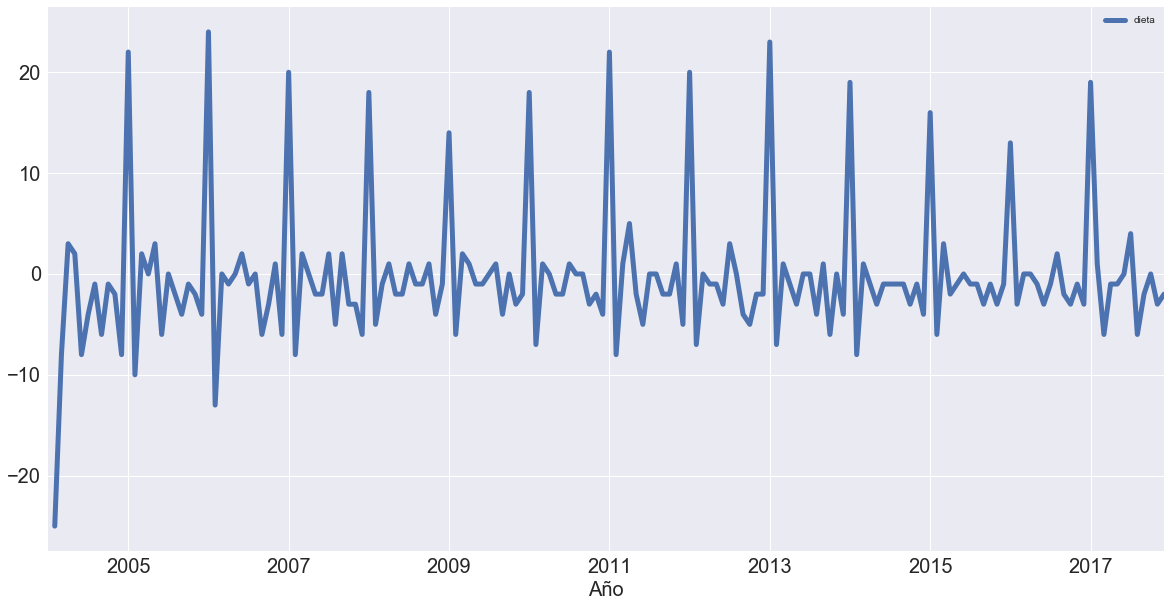

In [193]:
# Usamos el metodo pd.diff()

dieta.diff().plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.xlabel("Año", fontsize=20);

Ahora que removimos la mayor parte de la `tendencia`, es decir, podemos ver que la serie esta centrada alrededor de 0 (no se ve la tendencia que vimos anteriormente). Y aun mas importante es notar que los `picos en la grafica` en `Enero` (comienzos de año) son mucho mas evidentes ahora. Cada Enero hay una salto tremendo de 20% o mas en la busqueda de la palabra `dieta`. 

**Nota:** También se puede realizar una `diferenciación de segundo orden` si la tendencia aún no se elimina por completo. Si desean mas informacion sobre `diferenciacion` pueden encontrarlo [aquí](https://www.otexts.org/fpp/8/1).

* La **diferenciación** es muy útil para convertir una **serie temporal** en una **serie temporal estacionaria**. Aquí no profundizaremos mucho en esto, pero una `serie temporal estacionaria` es aquella cuyas propiedades estadísticas (como su **Promedio** y su **Variancia**) no cambian con el tiempo. Las **series temporales estacionarias** son útiles porque muchos métodos de pronóstico de series de tiempo se basan en la suposición de que la serie temporal es aproximadamente estacionaria.

**Resumen:**

* Se importaron los datos de las tendencias de Google y fueron revisados brevemente;
* Se ha discutido los datos y se convirtieron a la forma deseada para prepararlos para el análisis.
* Se ha verificado la serie temporal visualmente.
* Se ha identificado tendencias de la serie temporal.
* Se ha usado la diferenciación de primer orden de series de tiempo.

**A continuacion:**

* Se analizara la periodicidad de la serie de tiempo observando su función de autocorrelación;
* Pero antes: un breve desvío para hablar sobre **correlación.**

### Periodicidad y Autocorrelación

Una serie temporal es **_periódica_** si se repite a intervalos igualmente espaciados, por ejemplo, cada 12 meses. Otra forma de pensar en esto es que si la serie tiene un máximo en algún lugar, tendrá un máximo de 12 meses después, y si tiene un valle en alguna parte, también tendrá un valle 12 meses después de eso. 

* Otra forma de pensar sobre esto es que la serie de tiempo está **_correlacionada_** con ella misma pero adelantada en 12 meses.

* El concepto de **_autocorrelación_** captura la correlación de una serie de tiempo con su versión adelantada.

* Primero, recordemos que es **correlación**:

### Correlación

El coeficiente de correlación de dos variables capta que tan linearmente relacionadas están:

* Importamos el conjunto de datos de la flor Iris del paquete `scikit-learn`, luego lo convertimos en un DataFrame, y vemos las primeras filas:

<img src="data/sepalo.jpg">

In [194]:
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


* Utilizando `pandas` o `seaborn` para construir un diagrama de dispersión de `sepal length` (longitud del sépalo de la flor) vs. `sepal width` (ancho del sépalo de la flor), y coloreado segun el `target` (objetivo - que es la especie de flor):

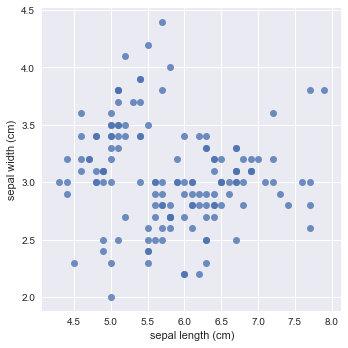

In [195]:
# Primero sin color
# Usando Seaborn funcion de regresion linear 'lmplot' solo para crear el diagrama de dispersion
# apagamos la regresion usando el parametro 'fit_reg=False'

sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris);

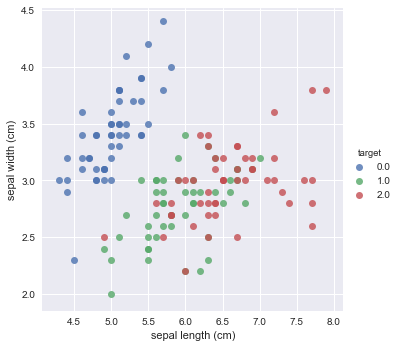

In [196]:
# Con color
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris, hue='target');

* Calcule los coeficientes de correlación de cada par de mediciones:

In [197]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


**Pregunta:** 

1) ¿La longitud y el ancho del sépalo se correlacionan positiva o negativamente en todas las flores? 

2) ¿Están correlacionados positiva o negativamente dentro de cada especie? Esta es una distinción esencial.

* Viendo la grafica sin color: Notamos que la **'longitud del sépalo (cm)'** y el **'ancho del sépalo (cm)'** parecen estar **negativamente correlacionados** con un coeficient de **-0.109369**. Y lo son, sobre **toda la población de flores medidas**. 

* **Pero no dentro de cada especie.** Viendo la grafica a colores por ejemplo, la primera especie (color azul) vemos una correlacion positiva. 

* Para los interesados, esto se conoce como **la paradoja de Simpson** y es esencial cuando se piensa en la inferencia causal. Pueden leer más al respecto [aquí](http://ftp.cs.ucla.edu/pub/stat_ser/r414.pdf). 

* Calculamos los coeficientes de correlación de cada par de mediciones dentro de cada especie:

In [198]:
df_iris.groupby(['target']).corr()

petal length (cm)  petal width (cm)  \
target                                                          
0.0    petal length (cm)           1.000000          0.306308   
       petal width (cm)            0.306308          1.000000   
       sepal length (cm)           0.263874          0.279092   
       sepal width (cm)            0.176695          0.279973   
1.0    petal length (cm)           1.000000          0.786668   
       petal width (cm)            0.786668          1.000000   
       sepal length (cm)           0.754049          0.546461   
       sepal width (cm)            0.560522          0.663999   
2.0    petal length (cm)           1.000000          0.322108   
       petal width (cm)            0.322108          1.000000   
       sepal length (cm)           0.864225          0.281108   
       sepal width (cm)            0.401045          0.537728   

                          sepal length (cm)  sepal width (cm)  
target                                                         
0.0    petal length (cm)           0.263874          0.176695  
       petal width (cm)            0.279092          0.279973  
       sepal length (cm)           1.000000          0.746780  
       sepal width (cm)            0.746780          1.000000  
1.0    petal length (cm)           0.754049          0.560522  
       petal width (cm)            0.546461          0.663999  
       sepal length (cm)           1.000000          0.525911  
       sepal width (cm)            0.525911          1.000000  
2.0    petal length (cm)           0.864225          0.401045  
       petal width (cm)            0.281108          0.537728  
       sepal length (cm)           1.000000          0.457228  
       sepal width (cm)            0.457228          1.000000

Podemos confirmar que dentro de cada especie las correlaciones son positivas.  Por ejemplo para `target 0.0` (objetivo 0.0) - la correlacion de **longitud de sepalo** vs **ancho de sepalo** es **0.746780**. Esta es una de la razones por la cual uno debe explorar el conjunto de datos los maximo posible. 

**Resumen:**

* Se importaron los datos de las tendencias de Google y fueron revisados brevemente;
* Se ha discutido los datos y se convirtieron a la forma deseada para prepararlos para el análisis.
* Se ha verificado la serie temporal visualmente.
* Se ha identificado tendencias de la serie temporal.
* Se ha usado la diferenciación de primer orden de series de tiempo.
* Hemos recordado el concepto de **correlacion**, como calcularla y hemos aprendido sobre _la paradoja de Simpson_

**A continuacion:**

* Se analizara la periodicidad de la serie de tiempo observando su función de autocorrelación.

### Correlación de Series de Tiempo

* Vamos a trazar todas las series de tiempo otra vez para recordar cómo lucen:

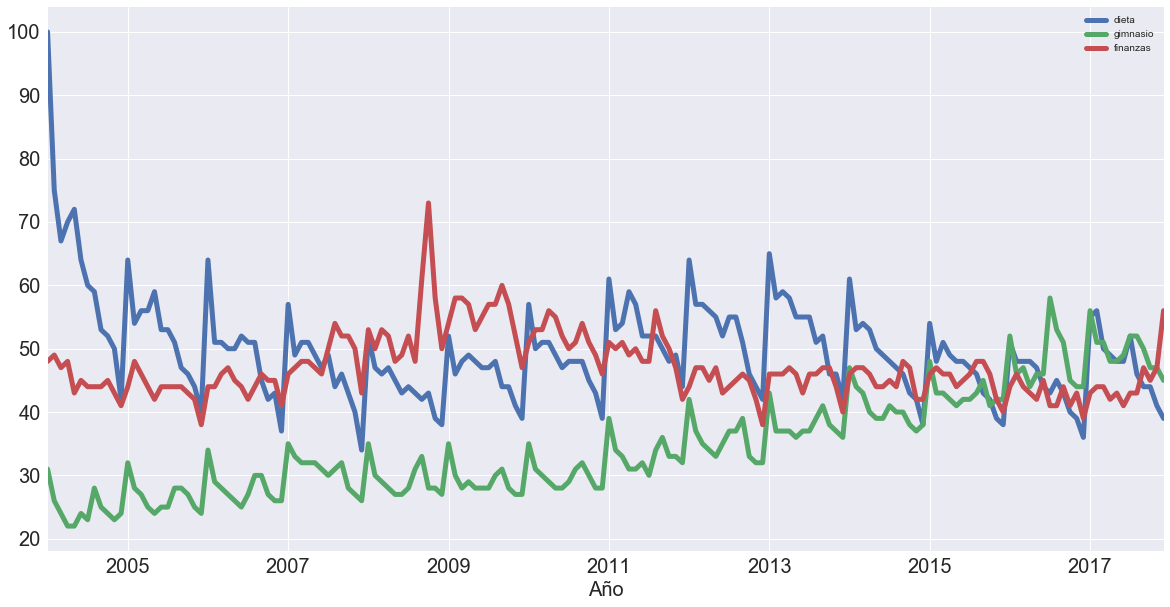

In [199]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.rc('legend', fontsize=20) 
plt.xlabel("Año", fontsize=20);

* Calculamos los coeficientes de correlación de todas estas series de tiempo:

In [200]:
df.corr()

,dieta,gimnasio,finanzas
dieta,1.000000,-0.100764,-0.034639
gimnasio,-0.100764,1.000000,-0.284279
finanzas,-0.034639,-0.284279,1.000000


* Podemos ver que **dieta** y **gimnasio** estan negativamente correlacionadas (**-0.100764**). Es interesante porque, los componentes **Estacionales** estan correlacionados, pero **la tendencia** no lo esta. Hay una correlacion negativa en **la tendencia** de **dieta** y **gimnasio** 

* Ahora trazaremos las **diferencias de primer orden** de estas series temporales (eliminando **la tendencia** puede revelar una correlación en **la estacionalidad**):

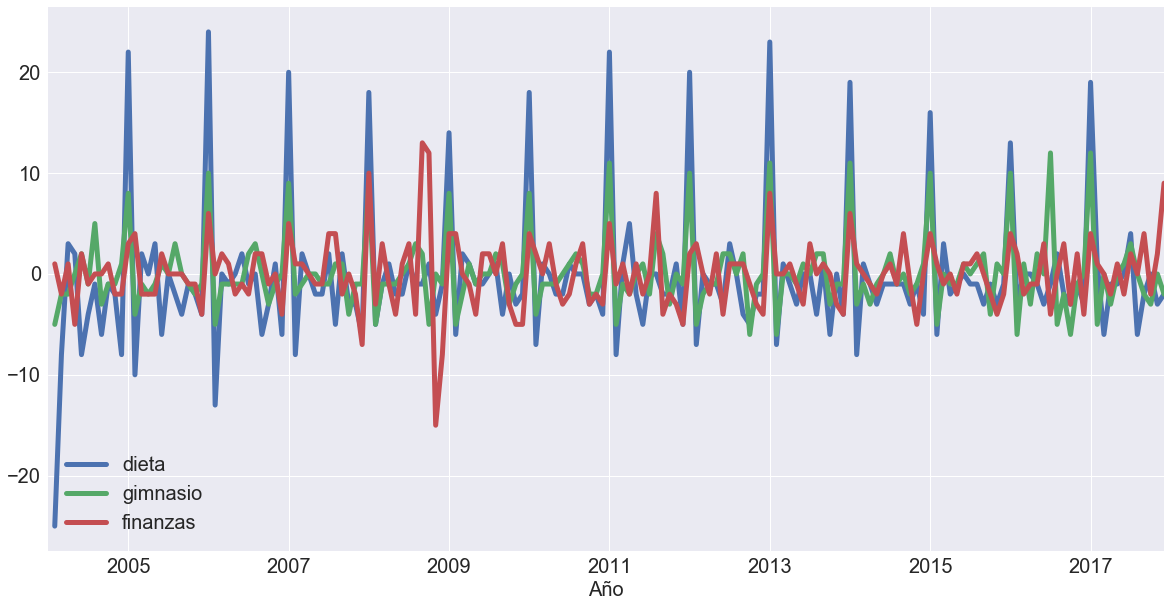

In [201]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20);

# Cambiamos la etiqueta del eje-x a "Año"
plt.rc('legend', fontsize=20) 
plt.xlabel("Año", fontsize=20);

Podemos ver que los **componentes Estacionales** de `dieta` y `gimnasio` estan correlacionados.

* Ahora calcularemos los **coeficientes de correlación** de las **diferencias de primer orden** de estas series de tiempo (eliminando **la tendencia** puede revelar una correlación en **la estacionalidad**):

In [202]:
df.diff().corr()

,dieta,gimnasio,finanzas
dieta,1.000000,0.758707,0.373828
gimnasio,0.758707,1.000000,0.301111
finanzas,0.373828,0.301111,1.000000


Habiendo removido la tendencia, y ahora con solamente los **componentes de estacionalidad**, los calculos confirman que **dieta** y **gimnasio** estan altamente correlacionados con un coeficiente de **0.758707**

## Autocorrelación

Ahora que hemos profundizado en la correlación de variables y la correlación de series de tiempo, es hora de trazar la autocorrelación de la serie 'dieta': en el eje x tienes el desfase y en el eje y tienes la correlación entre la la serie de tiempo está consigo misma en ese retraso. Por ejemplo: si la serie de tiempo original se repite cada dos días, esperaría ver un aumento en la función de autocorrelación a los 2 días.

* Trazamos la función de **autocorrelación** de la serie de tiempo `dieta`:

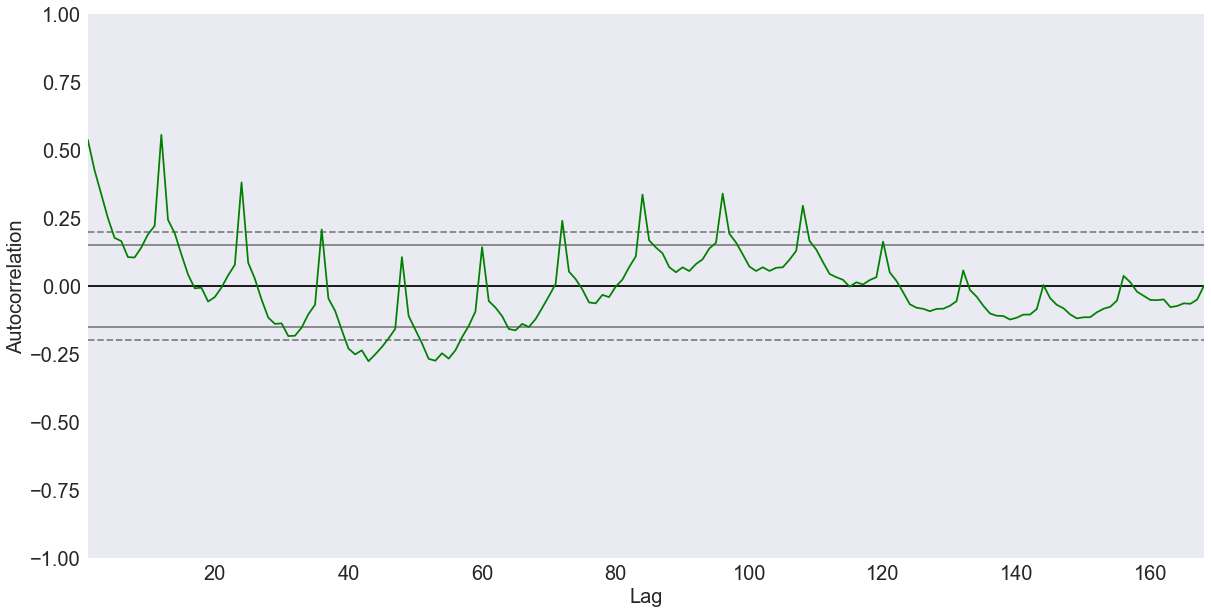

In [203]:
plt.figure(figsize=(20,10));
plt.rc('axes', labelsize=20) 
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
pd.plotting.autocorrelation_plot(dieta, color='green');

De nuevo, hemos identificado la `Estacionalidad` **(repetitividad)** de la busqueda de la palabra `dieta` en Google cada 12 meses. Por ejemplo podemos ver maximos (picos) cada 12 meses, es decir podemos ver esos maximos en un `lag` **(desfase)** de 24, 36, 48 , y asi sucesivamente.

**Resumen:**

* Se importaron los datos de las tendencias de Google y fueron revisados brevemente;
* Se ha discutido los datos y se convirtieron a la forma deseada para prepararlos para el análisis.
* Se ha verificado la serie temporal visualmente.
* Se ha identificado tendencias de la serie temporal.
* Se ha usado la diferenciación de primer orden de series de tiempo.
* Hemos recordado el concepto de **correlacion**, como calcularla y hemos aprendido sobre _la paradoja de Simpson_
* Se ha analizado la periodicidad de la serie de tiempos observando su función de autocorrelación.

En este código de Facebook en vivo a lo largo de la sesión, ha consultado los datos de las tendencias de Google de las palabras clave "dieta", "gimnasio" y miró de forma superficial "finanzas" para ver cómo varían con el tiempo. Para aquellos ansiosos científicos de datos, hay dos cosas que puedes hacer de inmediato:

* Observe y analice los datos columna 'finanzas' y luego informe lo que ha encontrado;
* Use el modelo ARIMA para hacer algunas predicciones de series temporales sobre cómo serán estas tendencias de búsqueda en los próximos años. Jason Brownlee en Machine Learning Mastery tiene un estupendo tutorial sobre [modelo ARIMA en Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/), y ademas **DataCamp** tiene un [gran curso sobre el modelo ARIMA usando R](https://www.datacamp.com/courses/arima-modeling-with-r) y **DataCamp** también tendra un curso de previsión Python Time Series funcionando este año.

Para obtener más información sobre Pandas, pueden ver el curso de la pagina DataCamp: [Manipulación de datos usando Python](https://www.datacamp.com/tracks/data-manipulation-with-python). Y para obtener más información sobre manipulacion de series de tiempo con Pandas, pueden ver el curso: [Manipulando Datos en Series de Tiempo usando Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python).

Si estás disfrutando de esta sesión, visita mi pagina de Facebook [Python Programming & Data Science](https://www.facebook.com/pythonfordatascience) y sígueme en Twitter: [@vmc62usa](https://twitter.com/vmc62usa)